# Preprocessing Data

In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

In [5]:
df = pd.read_csv("Loan_status_2007-2020Q3.csv", index_col=0)
df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10072\1743957999.py:1: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Loan_status_2007-2020Q3.csv", index_col=0)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [6]:
use_cols = ["loan_amnt", "term", "int_rate", "grade", "emp_length", "home_ownership", "annual_inc", "issue_d", "loan_status", "purpose", "dti", "earliest_cr_line", "application_type", "pub_rec_bankruptcies", "chargeoff_within_12_mths"]
df_selected = df[use_cols]
df_selected.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,application_type,pub_rec_bankruptcies,chargeoff_within_12_mths
0,5000.0,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-2011,Fully Paid,credit_card,27.65,Jan-1985,Individual,0.0,0.0
1,2500.0,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-2011,Charged Off,car,1.00,Apr-1999,Individual,0.0,0.0
2,2400.0,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-2011,Fully Paid,small_business,8.72,Nov-2001,Individual,0.0,0.0
3,10000.0,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-2011,Fully Paid,other,20.00,Feb-1996,Individual,0.0,0.0
4,3000.0,60 months,12.69%,B,1 year,RENT,80000.0,Dec-2011,Fully Paid,other,17.94,Jan-1996,Individual,0.0,0.0


In [7]:
df_selected.to_csv("loan_status_15cols.csv")
df_selected.to_parquet("loan_status_15cols.parquet")


In [8]:
!pip install pyarrow
!pip install fastparquet

In [9]:
datafile = "loan_status_15cols.parquet"
ori_df = pd.read_parquet(datafile)
ori_df.head()
ori_df.shape

(2925493, 15)

In [10]:
essential_df = ori_df.copy()

In [11]:
essential_df.isna().sum()

loan_amnt                        1
term                             1
int_rate                         1
grade                            1
emp_length                  205221
home_ownership                   1
annual_inc                       5
issue_d                          1
loan_status                      1
purpose                          1
dti                           3109
earliest_cr_line                30
application_type                 1
pub_rec_bankruptcies          1366
chargeoff_within_12_mths       146
dtype: int64

In [12]:
essential_df.dropna(inplace = True)

In [13]:
essential_df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
emp_length                  0
home_ownership              0
annual_inc                  0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
application_type            0
pub_rec_bankruptcies        0
chargeoff_within_12_mths    0
dtype: int64

In [14]:
essential_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2718623 entries, 0 to 105450
Data columns (total 15 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   loan_amnt                 float64
 1   term                      object 
 2   int_rate                  object 
 3   grade                     object 
 4   emp_length                object 
 5   home_ownership            object 
 6   annual_inc                float64
 7   issue_d                   object 
 8   loan_status               object 
 9   purpose                   object 
 10  dti                       float64
 11  earliest_cr_line          object 
 12  application_type          object 
 13  pub_rec_bankruptcies      float64
 14  chargeoff_within_12_mths  float64
dtypes: float64(5), object(10)
memory usage: 331.9+ MB


In [15]:
essential_df.reset_index(drop=True, inplace=True)

In [16]:
dt_cols = ["issue_d", "earliest_cr_line"]

essential_df[dt_cols] = essential_df[dt_cols].apply(pd.to_datetime)
essential_df.info()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10072\1178806277.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  essential_df[dt_cols] = essential_df[dt_cols].apply(pd.to_datetime)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10072\1178806277.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  essential_df[dt_cols] = essential_df[dt_cols].apply(pd.to_datetime)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718623 entries, 0 to 2718622
Data columns (total 15 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   loan_amnt                 float64       
 1   term                      object        
 2   int_rate                  object        
 3   grade                     object        
 4   emp_length                object        
 5   home_ownership            object        
 6   annual_inc                float64       
 7   issue_d                   datetime64[ns]
 8   loan_status               object        
 9   purpose                   object        
 10  dti                       float64       
 11  earliest_cr_line          datetime64[ns]
 12  application_type          object        
 13  pub_rec_bankruptcies      float64       
 14  chargeoff_within_12_mths  float64       
dtypes: datetime64[ns](2), float64(5), object(8)
memory usage: 311.1+ MB


In [17]:
categorical_cols = ["term", "grade", "home_ownership", "purpose", "application_type", "loan_status"]
for col in categorical_cols:
    essential_df[col] = essential_df[col].str.strip()
    essential_df[col] = essential_df[col].astype("category")

In [18]:
def convert_int_rate(x):
    if isinstance(x, str):  # Check if the value is a string
        s = re.compile(r"^\s*(\d*\.?\d*)").search(x).group(1)
        return float(s) if s else None
    return x  # Return the original value if it's not a string

essential_df["int_rate"] = essential_df["int_rate"].apply(convert_int_rate)

In [19]:
def extract_emp_length_num(x):
    s = re.compile(r"(.+)year").search(x).group(1).strip()
    if s == "10+":
        return 10
    
    if s == "< 1":
        return 0
    
    return int(s)

essential_df["emp_length"] = essential_df["emp_length"].apply(extract_emp_length_num)
essential_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,application_type,pub_rec_bankruptcies,chargeoff_within_12_mths
0,5000.0,36 months,10.65,B,10,RENT,24000.0,2011-12-01,Fully Paid,credit_card,27.65,1985-01-01,Individual,0.0,0.0
1,2500.0,60 months,15.27,C,0,RENT,30000.0,2011-12-01,Charged Off,car,1.00,1999-04-01,Individual,0.0,0.0
2,2400.0,36 months,15.96,C,10,RENT,12252.0,2011-12-01,Fully Paid,small_business,8.72,2001-11-01,Individual,0.0,0.0
3,10000.0,36 months,13.49,C,10,RENT,49200.0,2011-12-01,Fully Paid,other,20.00,1996-02-01,Individual,0.0,0.0
4,3000.0,60 months,12.69,B,1,RENT,80000.0,2011-12-01,Fully Paid,other,17.94,1996-01-01,Individual,0.0,0.0


In [20]:
essential_df["loan_status"].value_counts()

loan_status
Fully Paid                                             1410670
Current                                                 946110
Charged Off                                             331691
Late (31-120 days)                                       14302
In Grace Period                                           9197
Late (16-30 days)                                         2337
Issued                                                    1903
Does not meet the credit policy. Status:Fully Paid        1514
Does not meet the credit policy. Status:Charged Off        530
Default                                                    369
Name: count, dtype: int64

In [21]:
essential_df.to_parquet("essential_df.parquet")

In [22]:
replace_pattern = {
    "Fully Paid": 0,
    "Current": 0,
    "Charged Off": 1,
    "Late (31-120 days)": 1,
    "In Grace Period": 1,
    "Late (16-30 days)": 1,
    "Issued": 0,
    "Does not meet the credit policy. Status:Fully Paid": 0,
    "Does not meet the credit policy. Status:Charged Off": 1,
    "Default": 1
}

essential_df["loan_status"] = essential_df["loan_status"].replace(replace_pattern)

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


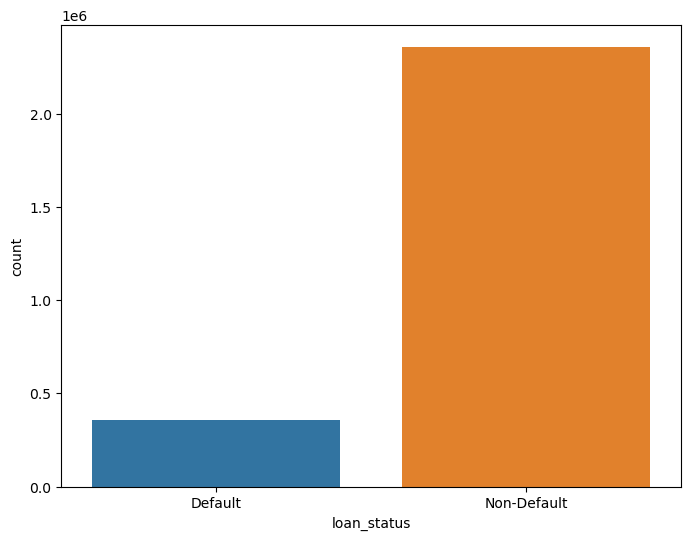

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(data=essential_df, x="loan_status")
ax.set_xticklabels(labels=["Default", "Non-Default"])
plt.show()

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

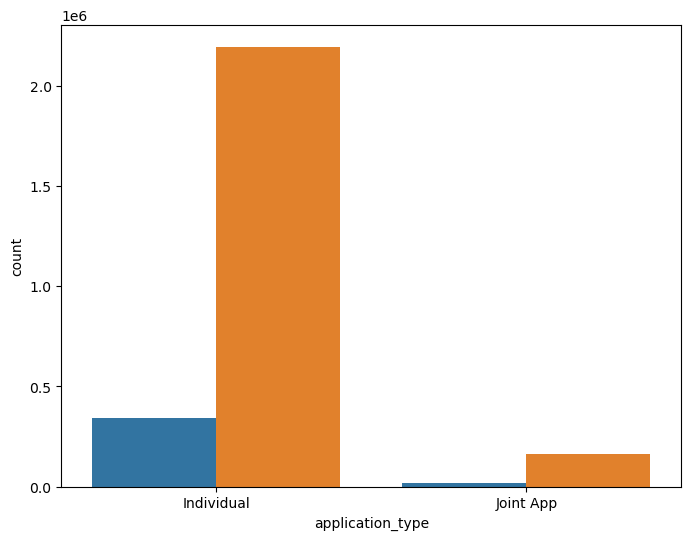

In [24]:
fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(data=essential_df, x="application_type", hue="loan_status")
ax.legend(labels=["Default", "Non-Default"], title="Loan Status")
plt.show()

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

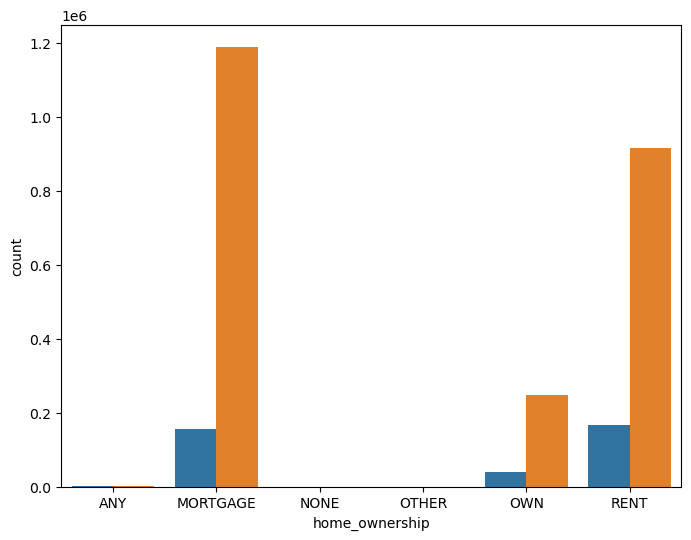

In [25]:
fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(data=essential_df, x="home_ownership", hue="loan_status")
ax.legend(labels=["Default", "Non-Default"], title="Loan Status")
plt.show()

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

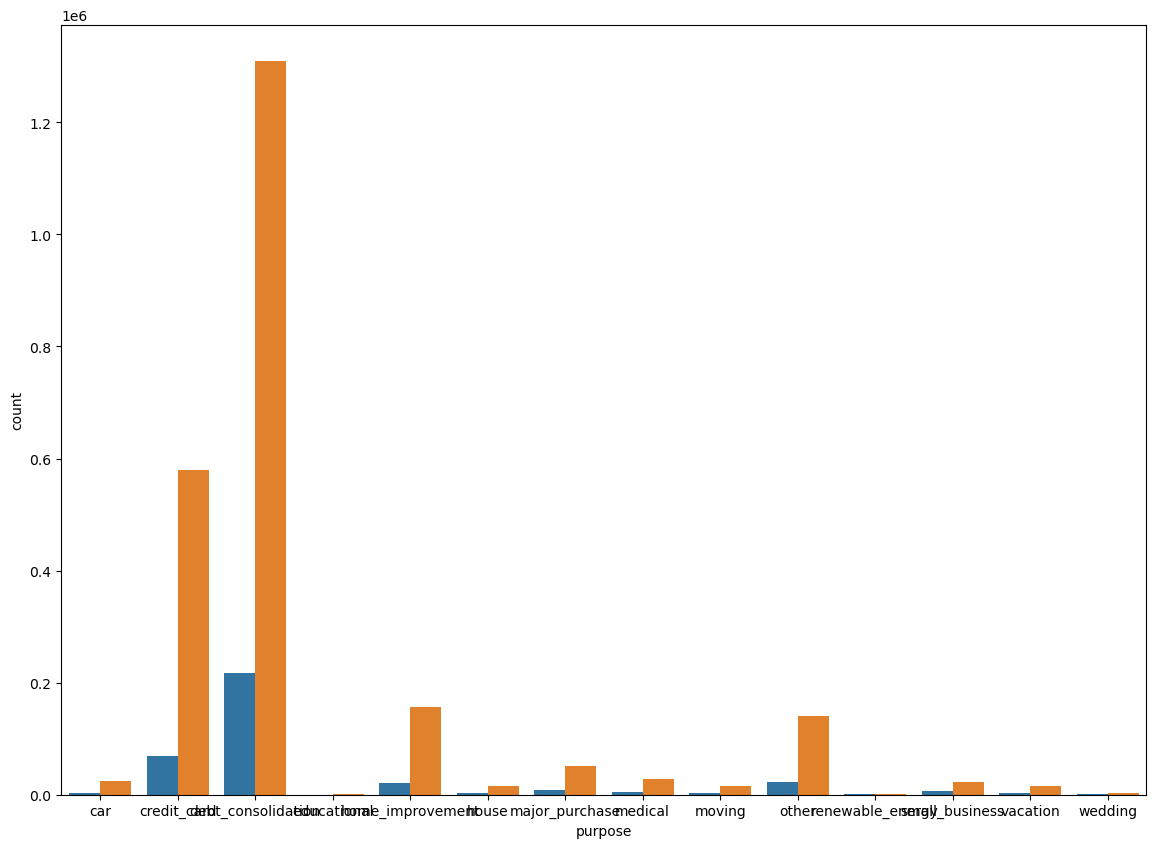

In [26]:
fig = plt.figure(figsize=(14, 10))
ax = sns.countplot(data=essential_df, x="purpose", hue="loan_status")
ax.legend(labels=["Default", "Non-Default"], title="Loan Status")
plt.xticks(rotation=90)
plt.show() 

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

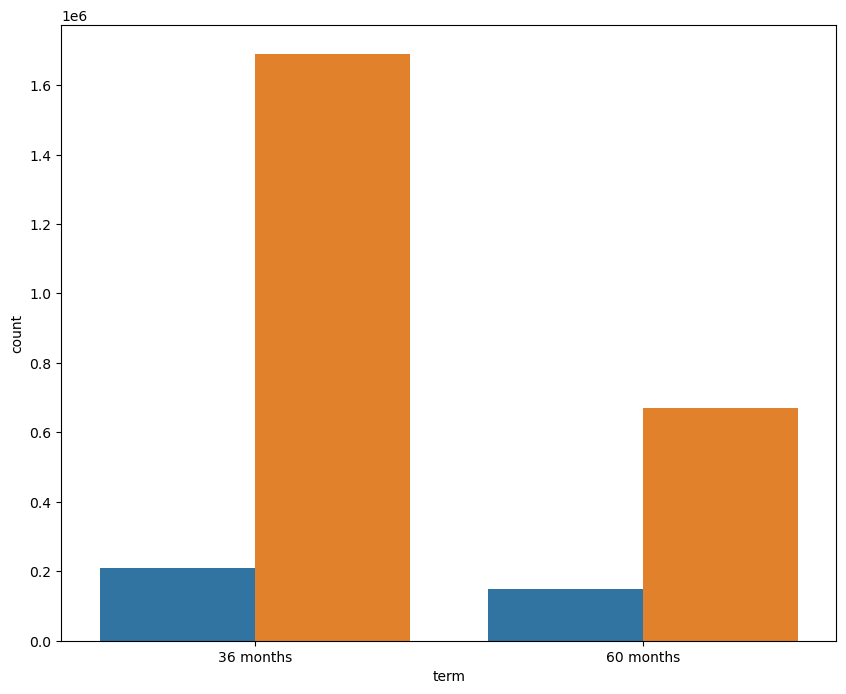

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = sns.countplot(data=essential_df, x="term", hue="loan_status")
ax.legend(labels=["Default", "Non-Default"], title="Loan Status")
plt.show()

In [28]:
annual_cat = ["Low", "Average", "High", "Super High"]
anu_quantile_data = pd.qcut(x=essential_df["annual_inc"], q=4, labels=annual_cat)

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

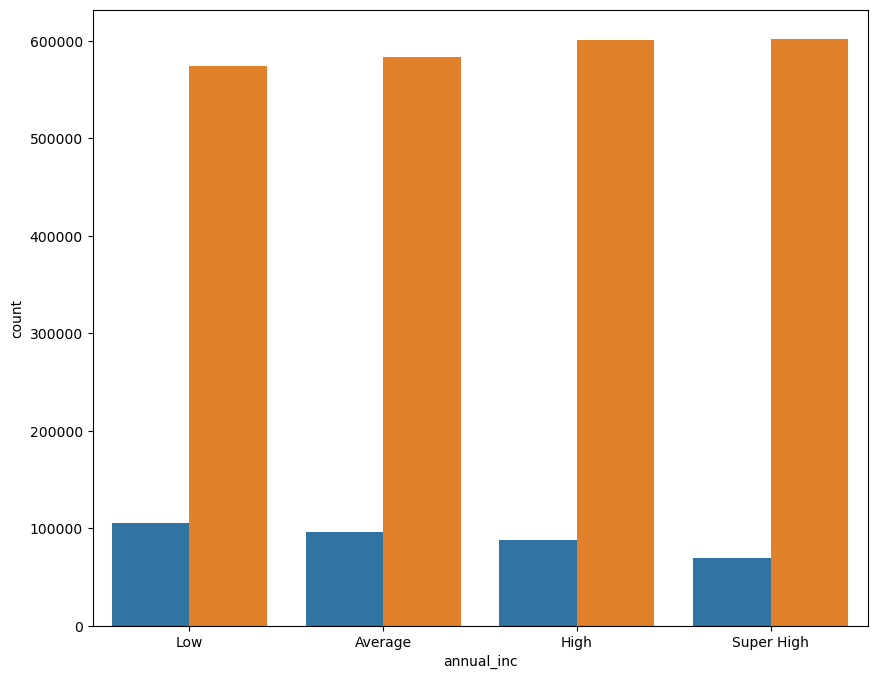

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = sns.countplot(x=anu_quantile_data, hue=essential_df['loan_status'])
ax.legend(labels=["Default", "Non-Default"], title="Loan Status")
plt.show()

AttributeError: 'int' object has no attribute 'startswith'

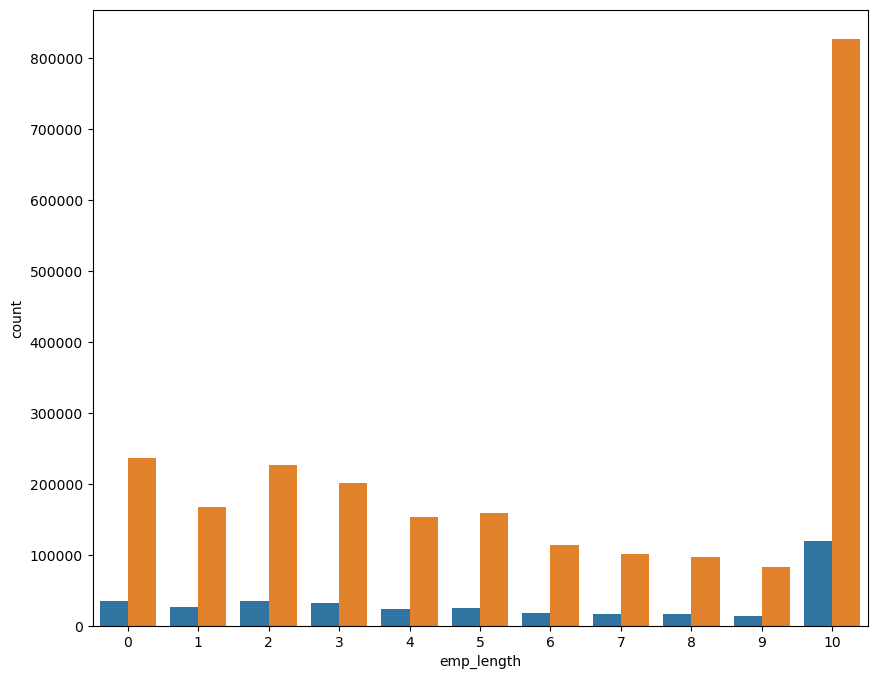

In [30]:
fig = plt.figure(figsize=(10, 8))
ax = sns.countplot(data=essential_df, x="emp_length", hue=essential_df["loan_status"])
ax.legend(labels=["Default", "Non-Default"], title="Loan Status")
plt.show()

In [31]:
process_df = essential_df.drop(labels=["grade"], axis=1)

In [32]:
process_df["month_cr_history"] = np.round((process_df["issue_d"] - process_df["earliest_cr_line"]).dt.days/30.4375)
process_df["month_cr_history"] = process_df["month_cr_history"].astype("int")

In [33]:
process_df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,application_type,pub_rec_bankruptcies,chargeoff_within_12_mths,month_cr_history
0,5000.0,36 months,10.65,10,RENT,24000.0,2011-12-01,0,credit_card,27.65,1985-01-01,Individual,0.0,0.0,323
1,2500.0,60 months,15.27,0,RENT,30000.0,2011-12-01,1,car,1.00,1999-04-01,Individual,0.0,0.0,152
2,2400.0,36 months,15.96,10,RENT,12252.0,2011-12-01,0,small_business,8.72,2001-11-01,Individual,0.0,0.0,121
3,10000.0,36 months,13.49,10,RENT,49200.0,2011-12-01,0,other,20.00,1996-02-01,Individual,0.0,0.0,190
4,3000.0,60 months,12.69,1,RENT,80000.0,2011-12-01,0,other,17.94,1996-01-01,Individual,0.0,0.0,191


In [34]:
process_df["application_type"] = process_df["application_type"].replace("Joint App", "Joint_App")

In [35]:
process_df["term"] = process_df["term"].apply(lambda x: x.replace(" ", "_"))

In [36]:
term_dummy = pd.get_dummies(process_df['term'], prefix='term')
term_dummy

,term_36_months,term_60_months
0,True,False
1,False,True
2,True,False
3,True,False
4,False,True
...,...,...
2718618,False,True
2718619,True,False
2718620,True,False
2718621,True,False


In [37]:
dum_prefix = {
    "term": "term",
    "home_ownership": "home_ownership",
    "purpose": "purpose",
    "application_type": "app_type"
}

process_df = pd.get_dummies(process_df, columns=list(dum_prefix.keys()), prefix=list(dum_prefix.values()))


In [38]:
process_df.columns

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'pub_rec_bankruptcies',
       'chargeoff_within_12_mths', 'month_cr_history', 'term_36_months',
       'term_60_months', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'app_type_Individual',
       'app_type_Joint_App'],
      dtype='object')

In [39]:
process_df = process_df.replace({True: 1, False: 0})
process_df.head()

,loan_amnt,int_rate,emp_length,annual_inc,issue_d,loan_status,dti,earliest_cr_line,pub_rec_bankruptcies,chargeoff_within_12_mths,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,app_type_Individual,app_type_Joint_App
0,5000.0,10.65,10,24000.0,2011-12-01,0,27.65,1985-01-01,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,15.27,0,30000.0,2011-12-01,1,1.00,1999-04-01,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2400.0,15.96,10,12252.0,2011-12-01,0,8.72,2001-11-01,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,13.49,10,49200.0,2011-12-01,0,20.00,1996-02-01,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,3000.0,12.69,1,80000.0,2011-12-01,0,17.94,1996-01-01,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [40]:
process_df.to_parquet("loan_status_processed_df.parquet")

In [41]:
del process_df, essential_df

In [42]:
process_df = pd.read_parquet("loan_status_processed_df.parquet")


In [43]:
process_df.head()

,loan_amnt,int_rate,emp_length,annual_inc,issue_d,loan_status,dti,earliest_cr_line,pub_rec_bankruptcies,chargeoff_within_12_mths,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,app_type_Individual,app_type_Joint_App
0,5000.0,10.65,10,24000.0,2011-12-01,0,27.65,1985-01-01,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,15.27,0,30000.0,2011-12-01,1,1.00,1999-04-01,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2400.0,15.96,10,12252.0,2011-12-01,0,8.72,2001-11-01,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,13.49,10,49200.0,2011-12-01,0,20.00,1996-02-01,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,3000.0,12.69,1,80000.0,2011-12-01,0,17.94,1996-01-01,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


# Traning Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [45]:
X_features = process_df.drop(['loan_status', 'issue_d', 'earliest_cr_line'], axis = 1)
y_target = process_df['loan_status']

In [46]:
categorical_features = np.where(X_features.dtypes != np.float64)[0] 

In [47]:
categorical_features

array([ 2,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=int64)

In [48]:
X_features.head()

,loan_amnt,int_rate,emp_length,annual_inc,dti,pub_rec_bankruptcies,chargeoff_within_12_mths,month_cr_history,term_36_months,term_60_months,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,app_type_Individual,app_type_Joint_App
0,5000.0,10.65,10,24000.0,27.65,0.0,0.0,323,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,15.27,0,30000.0,1.00,0.0,0.0,152,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2400.0,15.96,10,12252.0,8.72,0.0,0.0,121,1,0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,13.49,10,49200.0,20.00,0.0,0.0,190,1,0,...,0,0,0,1,0,0,0,0,1,0
4,3000.0,12.69,1,80000.0,17.94,0.0,0.0,191,0,1,...,0,0,0,1,0,0,0,0,1,0


In [49]:
y_target

0          0
1          1
2          0
3          0
4          0
          ..
2718618    1
2718619    0
2718620    1
2718621    0
2718622    1
Name: loan_status, Length: 2718623, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 2412)

In [51]:
X_test

,loan_amnt,int_rate,emp_length,annual_inc,dti,pub_rec_bankruptcies,chargeoff_within_12_mths,month_cr_history,term_36_months,term_60_months,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,app_type_Individual,app_type_Joint_App
2428162,18000.0,24.99,10,69000.0,17.96,0.0,0.0,171,0,1,...,0,0,0,0,0,0,0,0,1,0
1590465,7200.0,14.98,5,32000.0,24.46,0.0,0.0,338,1,0,...,0,0,0,0,0,0,0,0,1,0
1445714,20000.0,6.03,1,85000.0,10.73,0.0,0.0,169,1,0,...,0,0,0,0,0,0,0,0,1,0
1238586,30000.0,17.97,10,85000.0,14.77,0.0,0.0,281,1,0,...,0,0,0,0,0,0,0,0,1,0
2694828,12025.0,11.44,10,123000.0,21.02,0.0,0.0,272,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878649,35000.0,12.73,3,81717.0,17.42,0.0,0.0,118,0,1,...,0,0,0,0,0,0,0,0,1,0
1157535,20000.0,11.02,3,60000.0,13.86,0.0,0.0,201,0,1,...,0,0,0,0,0,0,0,0,1,0
655897,25000.0,10.41,10,37000.0,32.73,0.0,0.0,195,1,0,...,0,0,0,0,0,0,0,0,0,1
2654137,4000.0,10.91,10,92000.0,16.14,0.0,0.0,285,1,0,...,0,0,0,0,0,0,1,0,1,0


In [52]:
X_test.to_parquet("X_test.parquet")

In [53]:
del X_features, y_target, process_df

In [54]:
y_test.value_counts()

loan_status
0    708593
1    106994
Name: count, dtype: int64

In [ ]:
x_test = pd.read_parquet()

# Resampling

In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = "minority", random_state = 81)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [56]:
y_train_resampled.value_counts()

loan_status
0    1651604
1    1651604
Name: count, dtype: int64

# Model 

## 1. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [64]:
import pickle
pickle.dump(lr_model,open('lr_model.pkl','wb'))

In [59]:
lr_y_proba_preds = lr_model.predict_proba(X_test)
lr_y_proba_preds

array([[0.25203052, 0.74796948],
       [0.53938635, 0.46061365],
       [0.596228  , 0.403772  ],
       ...,
       [0.57644955, 0.42355045],
       [0.64637131, 0.35362869],
       [0.59676404, 0.40323596]])

In [60]:
lr_y_proba_preds[:, 1]

array([0.74796948, 0.46061365, 0.403772  , ..., 0.42355045, 0.35362869,
       0.40323596])

In [61]:
lr_y_preds = (lr_y_proba_preds[:, 1] >= 0.7).astype(int)
lr_y_preds

array([1, 0, 0, ..., 0, 0, 0])

In [62]:
results_df = pd.concat([
        pd.DataFrame(y_test.reset_index(drop = True)),
        pd.DataFrame(lr_y_preds, columns = ['lr_pred']),
        pd.DataFrame(lr_y_proba_preds[:, 1], columns = ['lr_pred_proba'])
    ], axis = 1)

results_df

,loan_status,lr_pred,lr_pred_proba
0,0,1,0.747969
1,1,0,0.460614
2,1,0,0.403772
3,0,0,0.556681
4,0,0,0.332546
...,...,...,...
815582,0,0,0.577449
815583,0,0,0.502695
815584,0,0,0.423550
815585,0,0,0.353629


In [63]:
results_df.to_parquet("data_results.parquet")

## 2. Random Forest Classfier

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [161]:
rfc_model = RandomForestClassifier(n_estimators = 50, bootstrap = True, random_state = 1000)
rfc_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=50, random_state=1000)

In [162]:
import pickle
pickle.dump(rfc_model,open('rfc_model.pkl','wb'))

In [68]:
rfc_y_proba_preds = rfc_model.predict_proba(X_test)
rfc_y_proba_preds

array([[0.51, 0.49],
       [0.5 , 0.5 ],
       [0.97, 0.03],
       ...,
       [0.88, 0.12],
       [0.97, 0.03],
       [0.94, 0.06]])

In [69]:
rfc_y_preds = (rfc_y_proba_preds[:, 1] >= 0.7).astype(int)
rfc_y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
result_df = pd.read_parquet("data_results.parquet")
result_df

,loan_status,lr_pred,lr_pred_proba
0,0,1,0.747969
1,1,0,0.460614
2,1,0,0.403772
3,0,0,0.556681
4,0,0,0.332546
...,...,...,...
815582,0,0,0.577449
815583,0,0,0.502695
815584,0,0,0.423550
815585,0,0,0.353629


In [71]:
results_df = pd.concat([
        results_df,
        pd.DataFrame(rfc_y_preds, columns = ['rfc_pred']),
        pd.DataFrame(rfc_y_proba_preds[:, 1], columns = ['rfc_pred_proba'])
    ], axis = 1)

results_df

,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba
0,0,1,0.747969,0,0.49
1,1,0,0.460614,0,0.50
2,1,0,0.403772,0,0.03
3,0,0,0.556681,0,0.15
4,0,0,0.332546,0,0.25
...,...,...,...,...,...
815582,0,0,0.577449,0,0.31
815583,0,0,0.502695,0,0.02
815584,0,0,0.423550,0,0.12
815585,0,0,0.353629,0,0.03


In [72]:
results_df.to_parquet("data_results.parquet")

## 3. XGBoost

In [73]:
!pip install xgboost

In [74]:
import xgboost as xgb

In [75]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
import pickle
pickle.dump(xgb_model,open('xgb_model.pkl','wb'))

In [77]:
xgb_y_proba_preds = xgb_model.predict_proba(X_test)
xgb_y_proba_preds

array([[0.54729867, 0.45270133],
       [0.49200964, 0.50799036],
       [0.972125  , 0.02787502],
       ...,
       [0.89039385, 0.10960615],
       [0.8881829 , 0.11181714],
       [0.90510756, 0.09489243]], dtype=float32)

In [78]:
xgb_y_preds = (xgb_y_proba_preds[:, 1] >= 0.7).astype(int)
xgb_y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
results_df = pd.read_parquet("data_results.parquet")
results_df

,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba
0,0,1,0.747969,0,0.49
1,1,0,0.460614,0,0.50
2,1,0,0.403772,0,0.03
3,0,0,0.556681,0,0.15
4,0,0,0.332546,0,0.25
...,...,...,...,...,...
815582,0,0,0.577449,0,0.31
815583,0,0,0.502695,0,0.02
815584,0,0,0.423550,0,0.12
815585,0,0,0.353629,0,0.03


In [80]:
results_df = pd.concat([
        results_df,
        pd.DataFrame(xgb_y_preds, columns = ['xgb_pred']),
        pd.DataFrame(xgb_y_proba_preds[:, 1], columns = ['xgb_pred_proba'])
    ], axis = 1)

results_df

,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba,xgb_pred,xgb_pred_proba
0,0,1,0.747969,0,0.49,0,0.452701
1,1,0,0.460614,0,0.50,0,0.507990
2,1,0,0.403772,0,0.03,0,0.027875
3,0,0,0.556681,0,0.15,0,0.140285
4,0,0,0.332546,0,0.25,0,0.107470
...,...,...,...,...,...,...,...
815582,0,0,0.577449,0,0.31,0,0.232593
815583,0,0,0.502695,0,0.02,0,0.082686
815584,0,0,0.423550,0,0.12,0,0.109606
815585,0,0,0.353629,0,0.03,0,0.111817


In [81]:
results_df.to_parquet("data_results.parquet")

# State Of The Art


## 1. TabNet

In [101]:
!pip install pytorch_tabnet

In [106]:
import pytorch_tabnet

In [111]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

In [92]:
!nvidia-smi

Mon Jun 10 23:41:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 532.10                 Driver Version: 532.10       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060 L...  WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P8                1W /  N/A|      0MiB /  8188MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [112]:
import torch
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)} is available.")
else:
    print("No GPU available. Training will run on CPU.")

No GPU available. Training will run on CPU.


In [113]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [114]:
import torch
print("Is CUDA available: ", torch.cuda.is_available())

Is CUDA available:  False


In [115]:
tabnet_model = TabNetClassifier()
tabnet_model.fit(
    X_train_resampled.values, y_train_resampled.values,
    max_epochs=10,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=1,
    drop_last=False
)

c:\Users\ADMIN\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
c:\Users\ADMIN\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.29334 |  0:04:27s
epoch 1  | loss: 0.27572 |  0:08:23s
epoch 2  | loss: 0.2736  |  0:13:21s
epoch 3  | loss: 0.27197 |  0:18:09s
epoch 4  | loss: 0.27087 |  0:21:44s
epoch 5  | loss: 0.27012 |  0:26:50s
epoch 6  | loss: 0.26974 |  0:31:35s
epoch 7  | loss: 0.27047 |  0:34:44s
epoch 8  | loss: 0.26919 |  0:39:40s
epoch 9  | loss: 0.27073 |  0:44:38s


KeyboardInterrupt: 

In [116]:
import pickle
pickle.dump(tabnet_model,open('tabnet_model.pkl','wb'))

In [117]:
tabnet_y_proba_preds = tabnet_model.predict_proba(X_test.values)
tabnet_y_proba_preds

array([[0.61022156, 0.3897784 ],
       [0.5647442 , 0.4352558 ],
       [0.9696404 , 0.03035962],
       ...,
       [0.91387194, 0.08612799],
       [0.87434995, 0.12564999],
       [0.91752326, 0.08247667]], dtype=float32)

In [118]:
tabnet_y_preds = (tabnet_y_proba_preds[:, 1] >= 0.7).astype(int)
tabnet_y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
results_df = pd.read_parquet("data_results.parquet")
results_df

,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba,xgb_pred,xgb_pred_proba
0,0,1,0.747969,0,0.49,0,0.452701
1,1,0,0.460614,0,0.50,0,0.507990
2,1,0,0.403772,0,0.03,0,0.027875
3,0,0,0.556681,0,0.15,0,0.140285
4,0,0,0.332546,0,0.25,0,0.107470
...,...,...,...,...,...,...,...
815582,0,0,0.577449,0,0.31,0,0.232593
815583,0,0,0.502695,0,0.02,0,0.082686
815584,0,0,0.423550,0,0.12,0,0.109606
815585,0,0,0.353629,0,0.03,0,0.111817


In [120]:
results_df = pd.concat([
        results_df,
        pd.DataFrame(tabnet_y_preds, columns = ['tabnet_pred']),
        pd.DataFrame(tabnet_y_proba_preds[:, 1], columns = ['tabnet_pred_proba'])
    ], axis = 1)

results_df

,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba,xgb_pred,xgb_pred_proba,tabnet_pred,tabnet_pred_proba
0,0,1,0.747969,0,0.49,0,0.452701,0,0.389778
1,1,0,0.460614,0,0.50,0,0.507990,0,0.435256
2,1,0,0.403772,0,0.03,0,0.027875,0,0.030360
3,0,0,0.556681,0,0.15,0,0.140285,0,0.245887
4,0,0,0.332546,0,0.25,0,0.107470,0,0.104760
...,...,...,...,...,...,...,...,...,...
815582,0,0,0.577449,0,0.31,0,0.232593,0,0.183046
815583,0,0,0.502695,0,0.02,0,0.082686,0,0.128444
815584,0,0,0.423550,0,0.12,0,0.109606,0,0.086128
815585,0,0,0.353629,0,0.03,0,0.111817,0,0.125650


In [121]:
results_df.to_parquet("data_results.parquet")

## 2. CatBoost

In [124]:
!pip install catboost

  Using cached catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.1 MB 550.5 kB/s eta 0:03:04
   ---------------------------------------- 0.1/101.1 MB 950.9 kB/s eta 0:01:47
   ---------------------------------------- 0.2/101.1 MB 1.3 MB/s eta 0:01:21
   ---------------------------------------- 0.3/101.1 MB 1.3 MB/s eta 0:01:17
   ---------------------------------------- 0.4/101.1 MB 1.3 MB/s eta 0:01:17
   ---------------------------------------- 0.5/101.1 MB 1.5 MB/s eta 0:01:06
   ---------------------------------------- 0.6/101.1 MB 1.6 MB/s eta 0:01:02
   ---------------------------------------- 0.7/101.1 MB 1.7 MB/s eta 0:01:01
   -----------------

In [125]:
from catboost import CatBoostClassifier, Pool

In [163]:
y_train_resampled

0          0
1          1
2          0
3          0
4          0
          ..
3303203    1
3303204    1
3303205    1
3303206    1
3303207    1
Name: loan_status, Length: 3303208, dtype: int64

In [164]:
train_pool = Pool(data=X_train_resampled, label=y_train_resampled, cat_features= categorical_features)

In [165]:
catboost_model = CatBoostClassifier(iterations=10, 
                           learning_rate=0.1, 
                           depth=10, 
                           eval_metric='Accuracy', 
                           random_seed=42, 
                           logging_level='Verbose'
                           )

catboost_model.fit(train_pool, verbose=True)

0:	learn: 0.8413367	total: 466ms	remaining: 4.19s
1:	learn: 0.8526629	total: 923ms	remaining: 3.69s
2:	learn: 0.8512016	total: 1.43s	remaining: 3.33s
3:	learn: 0.8558429	total: 1.8s	remaining: 2.71s
4:	learn: 0.8565912	total: 2.24s	remaining: 2.24s
5:	learn: 0.8672279	total: 2.66s	remaining: 1.77s
6:	learn: 0.8699373	total: 3.1s	remaining: 1.33s
7:	learn: 0.8701338	total: 3.56s	remaining: 890ms
8:	learn: 0.8707441	total: 3.88s	remaining: 431ms
9:	learn: 0.8722551	total: 4.24s	remaining: 0us


In [166]:
import pickle
pickle.dump(catboost_model,open('catboost_model.pkl','wb'))

In [130]:
catboost_y_proba_preds = catboost_model.predict_proba(X_test)
catboost_y_proba_preds

array([[0.60185963, 0.39814037],
       [0.57188597, 0.42811403],
       [0.84087907, 0.15912093],
       ...,
       [0.80886595, 0.19113405],
       [0.55570901, 0.44429099],
       [0.83761516, 0.16238484]])

In [131]:
catboost_y_preds = (catboost_y_proba_preds[:, 1] >= 0.5).astype(int)
catboost_y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
results_df = pd.read_parquet("data_results.parquet")
results_df

,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba,xgb_pred,xgb_pred_proba,tabnet_pred,tabnet_pred_proba
0,0,1,0.747969,0,0.49,0,0.452701,0,0.389778
1,1,0,0.460614,0,0.50,0,0.507990,0,0.435256
2,1,0,0.403772,0,0.03,0,0.027875,0,0.030360
3,0,0,0.556681,0,0.15,0,0.140285,0,0.245887
4,0,0,0.332546,0,0.25,0,0.107470,0,0.104760
...,...,...,...,...,...,...,...,...,...
815582,0,0,0.577449,0,0.31,0,0.232593,0,0.183046
815583,0,0,0.502695,0,0.02,0,0.082686,0,0.128444
815584,0,0,0.423550,0,0.12,0,0.109606,0,0.086128
815585,0,0,0.353629,0,0.03,0,0.111817,0,0.125650


In [133]:
results_df = pd.concat([
        results_df,
        pd.DataFrame(catboost_y_preds, columns = ['catboost_pred']),
        pd.DataFrame(catboost_y_proba_preds[:, 1], columns = ['catboost_pred_proba'])
    ], axis = 1)

results_df

,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba,xgb_pred,xgb_pred_proba,tabnet_pred,tabnet_pred_proba,catboost_pred,catboost_pred_proba
0,0,1,0.747969,0,0.49,0,0.452701,0,0.389778,0,0.398140
1,1,0,0.460614,0,0.50,0,0.507990,0,0.435256,0,0.428114
2,1,0,0.403772,0,0.03,0,0.027875,0,0.030360,0,0.159121
3,0,0,0.556681,0,0.15,0,0.140285,0,0.245887,0,0.342944
4,0,0,0.332546,0,0.25,0,0.107470,0,0.104760,0,0.232500
...,...,...,...,...,...,...,...,...,...,...,...
815582,0,0,0.577449,0,0.31,0,0.232593,0,0.183046,0,0.350262
815583,0,0,0.502695,0,0.02,0,0.082686,0,0.128444,0,0.229655
815584,0,0,0.423550,0,0.12,0,0.109606,0,0.086128,0,0.191134
815585,0,0,0.353629,0,0.03,0,0.111817,0,0.125650,0,0.444291


In [134]:
results_df.to_parquet("data_results.parquet")

In [11]:
import pandas as pd
import numpy as np

# Model Evaluation

In [5]:
results_df = pd.read_parquet("data_results.parquet")
results_df

,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba,xgb_pred,xgb_pred_proba,tabnet_pred,tabnet_pred_proba,catboost_pred,catboost_pred_proba
0,0,1,0.747969,0,0.49,0,0.452701,0,0.389778,0,0.398140
1,1,0,0.460614,0,0.50,0,0.507990,0,0.435256,0,0.428114
2,1,0,0.403772,0,0.03,0,0.027875,0,0.030360,0,0.159121
3,0,0,0.556681,0,0.15,0,0.140285,0,0.245887,0,0.342944
4,0,0,0.332546,0,0.25,0,0.107470,0,0.104760,0,0.232500
...,...,...,...,...,...,...,...,...,...,...,...
815582,0,0,0.577449,0,0.31,0,0.232593,0,0.183046,0,0.350262
815583,0,0,0.502695,0,0.02,0,0.082686,0,0.128444,0,0.229655
815584,0,0,0.423550,0,0.12,0,0.109606,0,0.086128,0,0.191134
815585,0,0,0.353629,0,0.03,0,0.111817,0,0.125650,0,0.444291


## Define custom classification report function

In [6]:
def my_classification_report(y_test, y_proba_preds, labels={0:"Non-Default", 1:"Default"}, threshold=0.7):
    
    y_preds = np.where(y_proba_preds >= threshold, 1, 0)
    
    report_df = pd.DataFrame()
    for i in labels:
        precision = precision_score(y_test, y_preds, pos_label=i)
        recall = recall_score(y_test, y_preds, pos_label=i)
        f1 = f1_score(y_test, y_preds, pos_label=i)
        
        tmp_df = pd.DataFrame([f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"], columns=[labels[i]])
        report_df = pd.concat([report_df, tmp_df], axis=1)
        
        report_df = report_df.rename(index={0:"Precision", 1:"Recall", 2:"F1_score"})
        
        accuracy = accuracy_score(y_test, y_preds)
        
        cfm = confusion_matrix(y_test, y_preds)
        cfm_labled = pd.DataFrame(cfm, index=["Actual : Negative (0)", "Actual : Positive (1)"],
                                 columns=["Predict : Negative(0)", "Predict : Positive (1)"])
        print(report_df)
        print("---------")
        print(f"Accuracy = {accuracy:.2f}")
        
        return cfm_labled

In [48]:
def get_metrics(y_test, y_preds, labels={0:"Non-Default", 1:"Default"}, threshold = 0.7):

    for i in labels:
        precision = precision_score(y_test, y_preds, pos_label=0)
        recall = recall_score(y_test, y_preds, pos_label=0)
        f1 = f1_score(y_test, y_preds, pos_label=0) 
        accuracy = accuracy_score(y_test, y_preds)
        
    return accuracy, precision, recall, f1

In [50]:
# Assuming you have prediction probabilities for each model
lr_pred_proba = results_df['lr_pred_proba']
rfc_pred_proba = results_df['rfc_pred_proba']
xgb_pred_proba = results_df['xgb_pred_proba']
tabnet_pred_proba = results_df['tabnet_pred_proba']
catboost_pred_proba = results_df['catboost_pred_proba']

# Assuming you have true labels in y_test
y_test = results_df['loan_status']


In [51]:
threshold = 0.7
lr_preds = (lr_pred_proba >= threshold).astype(int)
rfc_preds = (rfc_pred_proba >= threshold).astype(int)
xgb_preds = (xgb_pred_proba >= threshold).astype(int)
tabnet_preds = (tabnet_pred_proba >= threshold).astype(int)
catboost_preds = (catboost_pred_proba >= threshold).astype(int)

In [52]:
# Function to calculate metrics
# def get_metrics(y_true, y_pred):
#     accuracy = accuracy_score(y_true, y_pred)
#     precision = precision_score(y_true, y_pred, pos_label=i)
#     recall = recall_score(y_true, y_pred, pos_label=i)
#     f1 = f1_score(y_true, y_pred, pos_label=i)
#     return accuracy, precision, recall, f1

# Collect metrics for each model
lr_metrics = get_metrics(y_test, lr_preds)
rfc_metrics = get_metrics(y_test, rfc_preds)
xgb_metrics = get_metrics(y_test, xgb_preds)
tabnet_metrics = get_metrics(y_test, tabnet_preds)
catboost_metrics = get_metrics(y_test, catboost_preds)

In [104]:
# Create a DataFrame with the metrics
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'XGBoost Classifier', 'TabNet Classifier', 'CatBoost Classifier'],
    'Accuracy': [lr_metrics[0], rfc_metrics[0], xgb_metrics[0], tabnet_metrics[0], catboost_metrics[0]],
    'Precision': [lr_metrics[1], rfc_metrics[1], xgb_metrics[1], tabnet_metrics[1], catboost_metrics[1]],
    'Recall': [lr_metrics[2], rfc_metrics[2], xgb_metrics[2], tabnet_metrics[2], catboost_metrics[2]],
    'F1-Score': [lr_metrics[3], rfc_metrics[3], xgb_metrics[3], tabnet_metrics[3], catboost_metrics[3]]
}

metrics_data

{'Model': ['Logistic Regression',
  'Random Forest Classifier',
  'XGBoost Classifier',
  'TabNet Classifier',
  'CatBoost Classifier'],
 'Accuracy': [0.8393304454337795,
  0.868370878888457,
  0.8687644604438276,
  0.8682200672644366,
  0.8675959768853598],
 'Precision': [0.8790668002084512,
  0.8690949764020057,
  0.8688541075219237,
  0.8688288213111596,
  0.8688763815836344],
 'Recall': [0.9450855427586781,
  0.9989613219436263,
  0.9998701652429532,
  0.9991715978001476,
  0.998251464521947],
 'F1-Score': [0.9108815140349373,
  0.9295140272699399,
  0.9297693755265624,
  0.9294527696276312,
  0.9290816611337135]}

## Evaluation


In [41]:
my_classification_report(results_df['loan_status'], results_df['lr_pred_proba'])

          Non-Default
Precision        0.88
Recall           0.95
F1_score         0.91
---------
Accuracy = 0.84


,Predict : Negative(0),Predict : Positive (1)
Actual : Negative (0),669681,38912
Actual : Positive (1),92128,14866


In [42]:
my_classification_report(results_df['loan_status'], results_df['xgb_pred_proba'])

          Non-Default
Precision        0.87
Recall           1.00
F1_score         0.93
---------
Accuracy = 0.87


,Predict : Negative(0),Predict : Positive (1)
Actual : Negative (0),708501,92
Actual : Positive (1),106942,52


In [43]:
my_classification_report(results_df['loan_status'], results_df['tabnet_pred_proba'])

          Non-Default
Precision        0.87
Recall           1.00
F1_score         0.93
---------
Accuracy = 0.87


,Predict : Negative(0),Predict : Positive (1)
Actual : Negative (0),708006,587
Actual : Positive (1),106891,103


In [44]:
my_classification_report(results_df['loan_status'], results_df['catboost_pred_proba'])

          Non-Default
Precision        0.87
Recall           1.00
F1_score         0.93
---------
Accuracy = 0.87


,Predict : Negative(0),Predict : Positive (1)
Actual : Negative (0),707354,1239
Actual : Positive (1),106748,246


In [109]:
metrics_df = pd.DataFrame(metrics_data)

print(metrics_df)

                      Model  Accuracy  Precision    Recall  F1-Score
0       Logistic Regression  0.839330   0.879067  0.945086  0.910882
1  Random Forest Classifier  0.868371   0.869095  0.998961  0.929514
2        XGBoost Classifier  0.868764   0.868854  0.999870  0.929769
3         TabNet Classifier  0.868220   0.868829  0.999172  0.929453
4       CatBoost Classifier  0.867596   0.868876  0.998251  0.929082


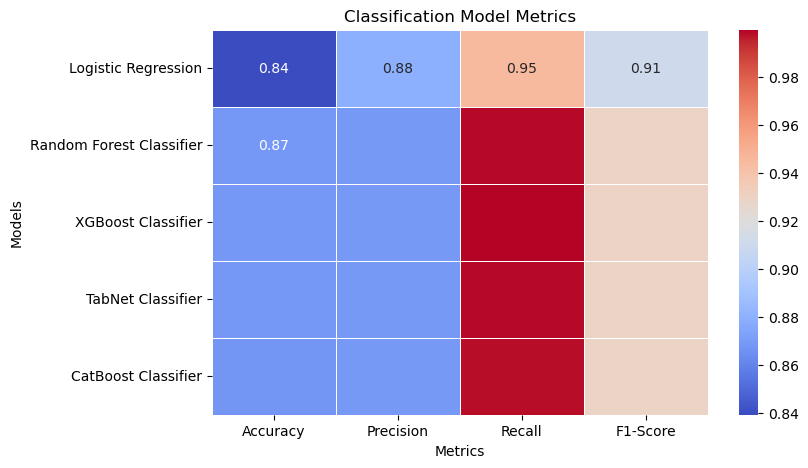

In [110]:
# Set the index to the model names
metrics_df = pd.DataFrame(metrics_data)

metrics_df.set_index('Model', inplace=True)

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(metrics_df, annot=True, fmt=".5f", cmap="coolwarm", cbar=True, linewidths=.5, annot_kws={"size": 10})

# Set the title and labels
plt.title('Classification Model Metrics')
plt.ylabel('Models')
plt.xlabel('Metrics')

# Show the plot
plt.show()

## ROC

In [147]:
def plot_roc_curve(y_test, data=None, col_names={}, colors={}):
    plt.figure(figsize=(12,10))
    
    ns_proba = np.ones(len(y_test)) * 0.5
    ns_fpr, ns_sensitivity, ns_thresholds = roc_curve(y_test, ns_proba)
    ns_auc = roc_auc_score(y_test, ns_proba)
    plt.plot(ns_fpr, ns_sensitivity, linestyle='-.', color='steelblue', label="No Skill")
    
    plt.text(0.9, 0.1, f"AUC = {ns_auc:.3f}", ha="right", fontsize=16, weight="bold", color="steelblue")
    plt.fill_between(ns_fpr, ns_sensitivity, facecolor="LightSteelBlue", alpha=0.6)
    
    y_auc = 0.2
    for col in col_names:
        y_proba = data[col]
        fpr, sensitivity, thresholds = roc_curve(y_test, y_proba)
        model_auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, sensitivity, color=colors[col], label=col_names[col])
        plt.text(0.9, y_auc, f"AUC = {model_auc:.3f}", ha="right", fontsize=16, weight="bold", color=colors[col])
        plt.fill_between(fpr, sensitivity, facecolor="#FFD580", alpha=0.4)
        y_auc += 0.1
        
    plt.title(f"ROC Chart")
    plt.xlabel("False Positive Rate")
    plt.ylabel("Sensitivity")
    plt.legend(fontsize=14)
    plt.show()

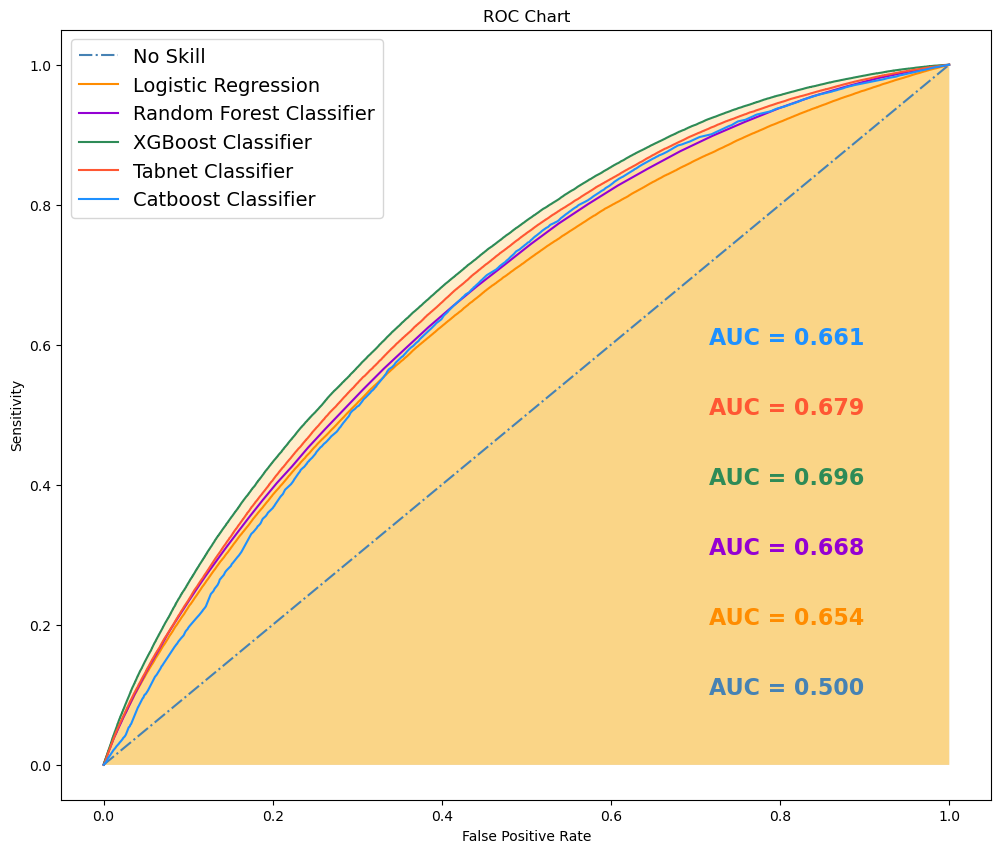

In [148]:
dict_names = {
    "lr_pred_proba": "Logistic Regression",
    "rfc_pred_proba": "Random Forest Classifier",
    "xgb_pred_proba": "XGBoost Classifier",
    "tabnet_pred_proba": "Tabnet Classifier",
    "catboost_pred_proba": "Catboost Classifier"
}

colors = {
    "lr_pred_proba": "#FF8C00",
    "rfc_pred_proba": "#9400D3",
    "xgb_pred_proba": "#2E8B57",
    "tabnet_pred_proba": "#FF5733",
    "catboost_pred_proba": "#1E90FF"
}

plot_roc_curve(results_df["loan_status"], data=results_df, col_names=dict_names, colors=colors)

## Expected Lost

In [149]:
results_df["loan_amnt"] = X_test["loan_amnt"].copy().reset_index(drop=True)
results_df["lgd"] = 1
results_df

,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba,xgb_pred,xgb_pred_proba,tabnet_pred,tabnet_pred_proba,catboost_pred,catboost_pred_proba,loan_amnt,lgd
0,0,1,0.747969,0,0.49,0,0.452701,0,0.389778,0,0.398140,18000.0,1
1,1,0,0.460614,0,0.50,0,0.507990,0,0.435256,0,0.428114,7200.0,1
2,1,0,0.403772,0,0.03,0,0.027875,0,0.030360,0,0.159121,20000.0,1
3,0,0,0.556681,0,0.15,0,0.140285,0,0.245887,0,0.342944,30000.0,1
4,0,0,0.332546,0,0.25,0,0.107470,0,0.104760,0,0.232500,12025.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815582,0,0,0.577449,0,0.31,0,0.232593,0,0.183046,0,0.350262,35000.0,1
815583,0,0,0.502695,0,0.02,0,0.082686,0,0.128444,0,0.229655,20000.0,1
815584,0,0,0.423550,0,0.12,0,0.109606,0,0.086128,0,0.191134,25000.0,1
815585,0,0,0.353629,0,0.03,0,0.111817,0,0.125650,0,0.444291,4000.0,1


In [152]:
results_df["lr_expected_lost"] = results_df["lr_pred_proba"] * results_df["lgd"] * results_df["loan_amnt"]
results_df["rfc_expected_lost"] = results_df["rfc_pred_proba"] * results_df["lgd"] * results_df["loan_amnt"]
results_df["xgb_expected_lost"] = results_df["xgb_pred_proba"] * results_df["lgd"] * results_df["loan_amnt"]
results_df["tabnet_expected_lost"] = results_df["tabnet_pred_proba"] * results_df["lgd"] * results_df["loan_amnt"]
results_df["catboost_expected_lost"] = results_df["catboost_pred_proba"] * results_df["lgd"] * results_df["loan_amnt"]
results_df["total_loss"] = results_df["loan_status"] * results_df["lgd"] * results_df["loan_amnt"]
results_df

,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba,xgb_pred,xgb_pred_proba,tabnet_pred,tabnet_pred_proba,catboost_pred,catboost_pred_proba,loan_amnt,lgd,lr_expected_lost,rfc_expected_lost,xgb_expected_lost,tabnet_expected_lost,catboost_expected_lost,total_loss
0,0,1,0.747969,0,0.49,0,0.452701,0,0.389778,0,0.398140,18000.0,1,13463.450684,8820.00,8148.623943,7016.011298,7166.526597,0.0
1,1,0,0.460614,0,0.50,0,0.507990,0,0.435256,0,0.428114,7200.0,1,3316.418269,3600.00,3657.530594,3133.841729,3082.420994,7200.0
2,1,0,0.403772,0,0.03,0,0.027875,0,0.030360,0,0.159121,20000.0,1,8075.439919,600.00,557.500347,607.192479,3182.418587,20000.0
3,0,0,0.556681,0,0.15,0,0.140285,0,0.245887,0,0.342944,30000.0,1,16700.432060,4500.00,4208.558500,7376.618385,10288.310162,0.0
4,0,0,0.332546,0,0.25,0,0.107470,0,0.104760,0,0.232500,12025.0,1,3998.861094,3006.25,1292.328611,1259.737729,2795.817016,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815582,0,0,0.577449,0,0.31,0,0.232593,0,0.183046,0,0.350262,35000.0,1,20210.724842,10850.00,8140.768558,6406.608894,12259.156254,0.0
815583,0,0,0.502695,0,0.02,0,0.082686,0,0.128444,0,0.229655,20000.0,1,10053.899180,400.00,1653.714925,2568.874657,4593.100195,0.0
815584,0,0,0.423550,0,0.12,0,0.109606,0,0.086128,0,0.191134,25000.0,1,10588.761278,3000.00,2740.153670,2153.199725,4778.351279,0.0
815585,0,0,0.353629,0,0.03,0,0.111817,0,0.125650,0,0.444291,4000.0,1,1414.514762,120.00,447.268575,502.599955,1777.163941,0.0


In [153]:
sum_loan_amount = results_df["loan_amnt"].sum()
sum_total_loss = results_df["total_loss"].sum()
sum_lr_expected_loss = results_df["lr_expected_lost"].sum()
sum_rfc_expected_loss = results_df["rfc_expected_lost"].sum()
sum_xgb_expected_loss = results_df["xgb_expected_lost"].sum()
sum_tabnet_expected_loss = results_df["tabnet_expected_lost"].sum()
sum_catboost_expected_loss = results_df["catboost_expected_lost"].sum()

print(f"Total Loan Amount: ${sum_loan_amount:,.2f}")
print(f"Total Loss : ${sum_total_loss:,.2f}")
print(f"Expected Loss By LR: ${sum_lr_expected_loss:,.2f}")
print(f"Expected Loss By RFC: ${sum_rfc_expected_loss:,.2f}")
print(f"Expected Loss By XGB: ${sum_xgb_expected_loss:,.2f}")
print(f"Expected Loss By Tabnet: ${sum_tabnet_expected_loss:,.2f}")
print(f"Expected Loss By Catboost: ${sum_catboost_expected_loss:,.2f}")

Total Loan Amount: $12,695,462,200.00
Total Loss : $1,745,587,625.00
Expected Loss By LR: $6,110,484,584.88
Expected Loss By RFC: $2,272,442,536.50
Expected Loss By XGB: $2,344,519,054.95
Expected Loss By Tabnet: $2,287,838,100.17
Expected Loss By Catboost: $3,839,964,289.34
